<a href="https://colab.research.google.com/github/JungMinSeung/ECG_analysis/blob/master/ECG_CNN_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
ECG_DATA=np.load('/content/drive/My Drive/세종병원/Data/윤지_ECG_array.npy')


In [0]:
ECG_DATA.shape

(5000, 12, 5000)

In [0]:
ECG_DATA

array([[[-253.76, -253.76, -253.76, ...,  -34.16,   24.4 ,    4.88],
        [ 263.52,  263.52,  263.52, ...,  -68.32,  -48.8 ,  -34.16],
        [ 517.28,  517.28,  517.28, ...,  -34.16,  -73.2 ,  -39.04],
        ...,
        [ 810.08,  810.08,  810.08, ..., -204.96, -200.08, -170.8 ],
        [ 810.08,  810.08,  810.08, ..., -200.08, -195.2 , -165.92],
        [ 527.04,  527.04,  527.04, ...,  102.48,   92.72,  112.24]],

       [[  -9.76,  -24.4 ,  -19.52, ...,   14.64,    9.76,    9.76],
        [   9.76,  -19.52,  -19.52, ...,    9.76,    9.76,    9.76],
        [  19.52,    4.88,    0.  , ...,   -4.88,    0.  ,    0.  ],
        ...,
        [  53.68,   34.16,   34.16, ...,  -14.64,  -19.52,  -24.4 ],
        [  48.8 ,   34.16,   34.16, ...,  -19.52,  -24.4 ,  -29.28],
        [   0.  ,  -14.64,   -9.76, ...,    4.88,    0.  ,   -4.88]],

       [[ -29.28,  -19.52,   -9.76, ...,   73.2 ,   78.08,   73.2 ],
        [ -63.44,  -53.68,  -43.92, ...,  -68.32,  -68.32,  -73.2 ],
    

In [0]:
df=pd.read_excel('/content/drive/My Drive/세종병원/Data/Diagnostics.xlsx')
label_df=df[['PatientAge','Gender']]
label_df.loc[label_df.Gender=='MALE','Gender']=1
label_df.loc[label_df.Gender=='FEMALE','Gender']=0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
label_df

,PatientAge,Gender
0,85,1
1,59,0
2,20,0
3,66,1
4,73,0
...,...,...
10641,80,0
10642,81,0
10643,39,1
10644,76,1


In [0]:
Age=label_df.PatientAge[:ECG_DATA.shape[0]]
Sex=label_df.Gender[:ECG_DATA.shape[0]]

In [0]:
Age.shape

(5000,)

In [0]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(ECG_DATA,Sex,test_size=0.36,random_state=42)
# 1750개의 데이터를 64:36 으로 train 데이터와 test데이터로 나눠줌.

In [0]:
from sklearn.model_selection import train_test_split 
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)
# train 데이터를 75:25로 train 데이터와 validation 데이터로 나눠줌.

In [0]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2400, 12, 5000)
(800, 12, 5000)
(1800, 12, 5000)


In [0]:
# X데이터를 2차원에서 3차원으로 변환(train,val,test 각각에 대해)
X_train_3=X_train.reshape(X_train.shape[0],12,5000,1)
X_val_3=X_val.reshape(X_val.shape[0],12,5000,1)
X_test_3=X_test.reshape(X_test.shape[0],12,5000,1)

In [0]:
# label 값인 y를 one hot encoding
from keras.utils import to_categorical

y_train_onehot=to_categorical(y_train,2)
y_val_onehot=to_categorical(y_val,2)
y_test_onehot=to_categorical(y_test,2)

print(y_train_onehot[0])

Using TensorFlow backend.


[1. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D,Activation,BatchNormalization

# Temporal Analysis

model=Sequential()

model.add(ZeroPadding2D(padding=(0,2560),
                       input_shape=(12,5000,1)))

model.add(Conv2D(filters=16,
                kernel_size=(1,7)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((1,2)))

model.add(Conv2D(filters=16,
                kernel_size=(1,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((1,4)))

model.add(Conv2D(filters=32,
                kernel_size=(1,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((1,2)))

model.add(Conv2D(filters=32,
                kernel_size=(1,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((1,4)))

model.add(Conv2D(filters=64,
                kernel_size=(1,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((1,2)))

model.add(Conv2D(filters=64,
                kernel_size=(1,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((1,2)))

model.add(Conv2D(filters=64,
                kernel_size=(1,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((1,2)))

model.add(Conv2D(filters=64,
                kernel_size=(1,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

In [0]:
# Spatial Analysis

model.add(Conv2D(filters=128,
                kernel_size=(12,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((1,2)))


In [0]:
# Fully Connected

from keras.layers import Dense,BatchNormalization, Dropout,Flatten

model.add(Flatten())


model.add(Dense(128,input_dim=(1,5080)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2)) # 조절

model.add(Dense(64,input_dim=(1,5080)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2)) # 조절

#model.add(Activation('softmax'))
model.add(Dense(2,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 12, 10120, 1)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 10114, 16)     128       
_________________________________________________________________
batch_normalization_12 (Batc (None, 12, 10114, 16)     64        
_________________________________________________________________
activation_12 (Activation)   (None, 12, 10114, 16)     0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 5057, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 5053, 16)      1296      
_________________________________________________________________
batch_normalization_13 (Batc (None, 12, 5053, 16)     

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(patience=20)

batch_size = 64
epochs = 100

history = model.fit(X_train_3,y_train_onehot,
                   validation_data=(X_val_3,y_val_onehot),
                    batch_size=batch_size,
                    nb_epoch=epochs, verbose=1,
                    callbacks=[early_stop]
                   )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 2400 samples, validate on 800 samples
Epoch 1/100
2400/2400 [==============================] - 14s 6ms/step - loss: 0.6600 - accuracy: 0.6483 - val_loss: 0.6476 - val_accuracy: 0.6175
Epoch 2/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.5022 - accuracy: 0.7579 - val_loss: 0.6801 - val_accuracy: 0.6263
Epoch 3/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.4522 - accuracy: 0.7933 - val_loss: 0.7502 - val_accuracy: 0.6375
Epoch 4/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3980 - accuracy: 0.8121 - val_loss: 0.5225 - val_accuracy: 0.7337
Epoch 5/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3343 - accuracy: 0.8479 - val_loss: 0.5431 - val_accuracy: 0.7138
Epoch 6/100
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3180 - accuracy: 0.8704 - val_loss: 0.5530 - val_accuracy: 0.7400
Epoch 7/100
2400/2400 [==============================] - 12s 5ms/step - loss:

In [0]:
train_accuracy = model.evaluate(X_train_3, y_train_onehot)
test_accuracy = model.evaluate(X_test_3, y_test_onehot)

print("Train Acc: ", train_accuracy)
print("Test Acc: ", test_accuracy)

1800/1800 [==============================] - 3s 2ms/step
Train Acc:  [0.04179008747140567, 0.9837499856948853]
Test Acc:  [1.0208525813950433, 0.7661111354827881]


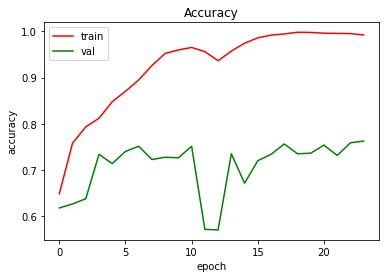

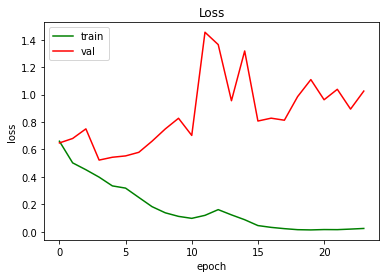

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], 'g')
plt.plot(history.history['val_loss'], 'r')

plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()